In [1]:
%load_ext zipline

In [10]:
from zipline.api import *
from zipline.algorithm import *
import zipline
# from plotly.offline import init_notebook_mode , plot , iplot , download_plotlyjs
import pandas as pd
import numpy as np
# import plotly as py
# import cufflinks as cf
import pyfolio as pf
from datetime import datetime
# init_notebook_mode(connected=True)
# cf.go_offline()
import matplotlib.pyplot as pt 
from matplotlib import style
style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5

In [11]:
def initialize(context):
    stock = 'AAPL,AMZN,GOOGL,EBAY,ACTG'
    stock = stock.split(',')
    context.universe = [symbol(_) for _ in stock]
    schedule_function(rsi_handling,
                      date_rules.every_day(),
                      time_rules.market_open(hours = 1)
                     )
    
def cal_rsi(df):   
    win = df[df > 0] 
    lose = df[df < 0] 
    up = win.mean() if len(win) > 0 else 0 
    down = abs(lose.mean()) if len(lose) > 0 else 0 
    return 100 * up / (up + down) 

def rsi_handling(context , data):
    lo = 9
    sel = 80
    buy = 25
    for st in context.universe :
        df = data.history(st ,
                            'price' , (lo+1) ,
                            '1d' )
        df = df.diff()
        ''' RSI Algorithms '''    
        ct = 0
        rsi = df.rolling(lo).agg(cal_rsi)
        rsi = rsi.fillna(0)
        
        open_orders = get_open_orders()
        
        if rsi[-1] <= buy :
            if st not in open_orders:
                order_target_percent(st , 1/len(context.universe) )
#                 print("buy trade at {}".format(context.get_datetime()))
                ct+=10
        elif rsi[-1] >= sel :
            if st in open_orders:
                order_target_percent(st , -1/len(context.universe) )
#                 print("sell trade at {}".format(context.get_datetime()))
                ct -=10
    ''' END RSI Algorithms '''
    record(ct = ct, rsi = rsi[-1])

def analyze(context , pref ):
    pt.plot(pref['ct'],'r',label = 'trading positions')
    pt.show()
    pt.plot(pref['rsi'], color = 'black',label = 'rsi')
    pt.axhline(80,label = 'sell')
    pt.axhline(20,label = 'buy')
    pt.xlabel('date')
    pt.ylabel('')
    pt.title('algorithms')
    pt.legend()
    pt.show()
    returns , positions , transactions = pf.utils.extract_rets_pos_txn_from_zipline(pref)    
    pf.create_full_tear_sheet(returns = returns , positions=positions, transactions=transactions,hide_positions=True)
    pt.show()

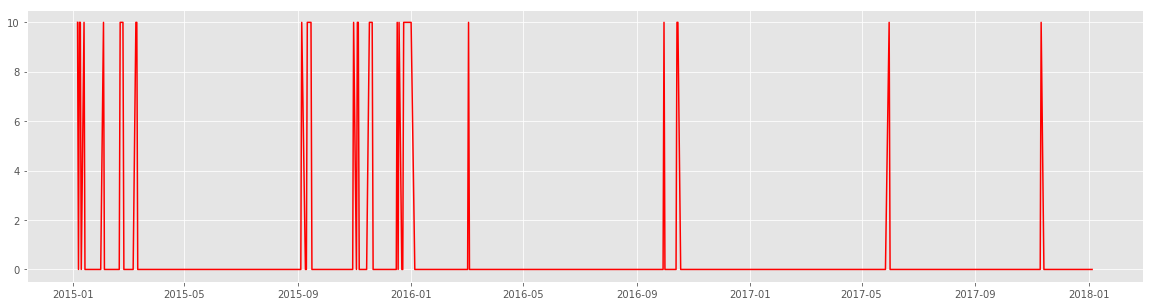

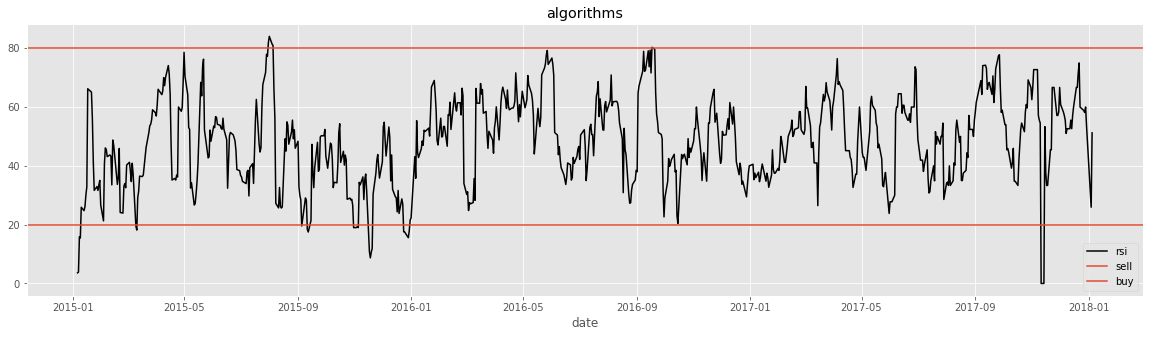

Start date,2015-01-05
End date,2018-01-04
Total months,36
,Backtest
Annual return,7.5%
Cumulative returns,24.3%
Annual volatility,20.7%
Sharpe ratio,0.45
Calmar ratio,0.23
Stability,0.41
Max drawdown,-32.5%


c:\users\hp t\anaconda3\envs\fin\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning:

'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.



Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,32.45,2015-01-07,2016-02-10,2016-09-01,432
1,11.01,2016-09-30,2016-11-14,2016-12-09,51
2,9.13,2017-07-19,2017-08-21,2017-09-19,45
3,6.24,2017-06-07,2017-07-06,2017-07-19,31
4,4.60,2017-09-21,2017-09-28,2017-10-27,27


Stress Events,mean,min,max
Fall2015,-0.03%,-3.59%,4.95%
New Normal,0.04%,-11.96%,4.95%


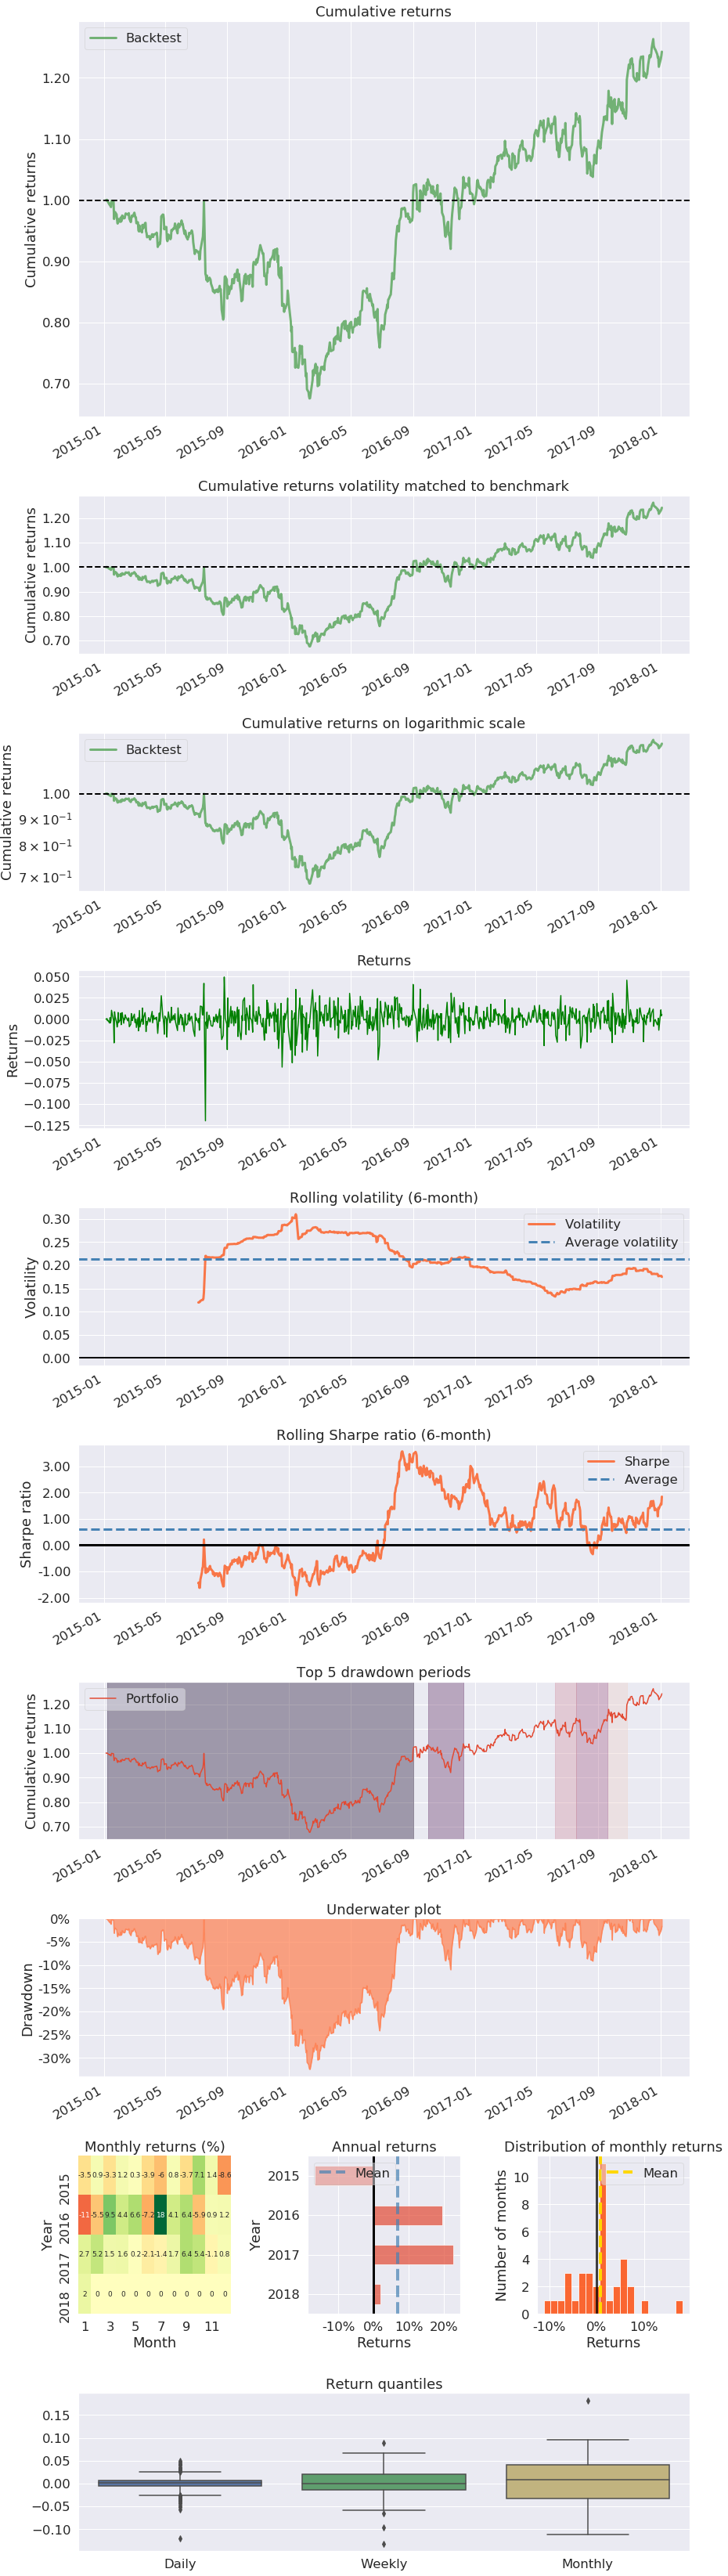

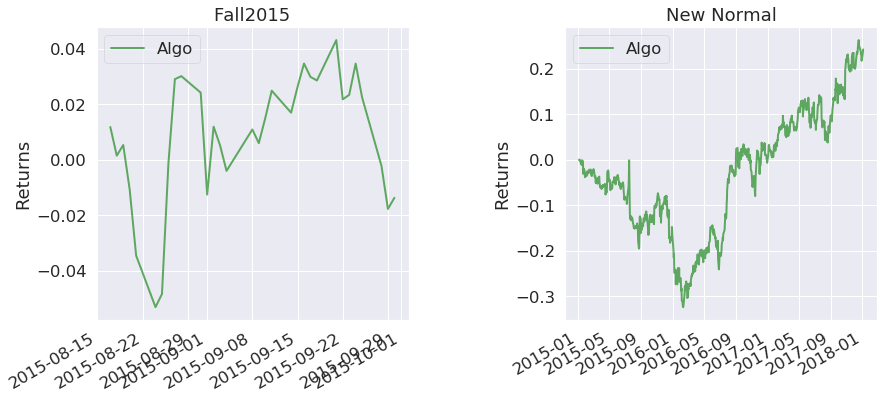

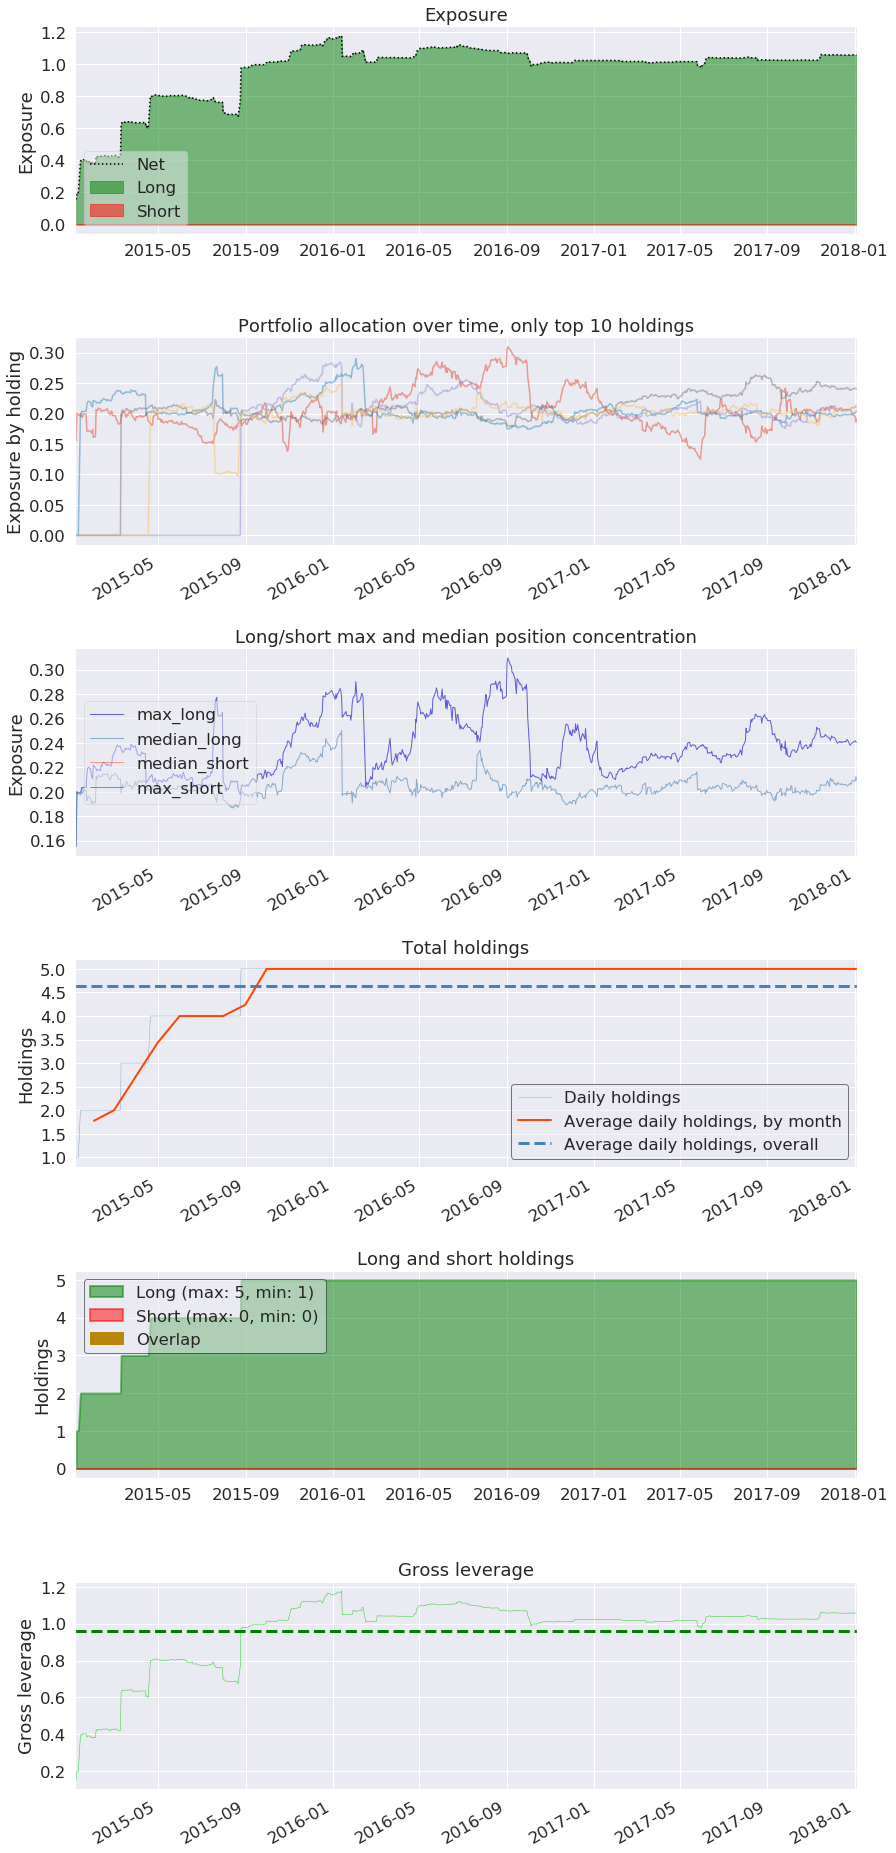

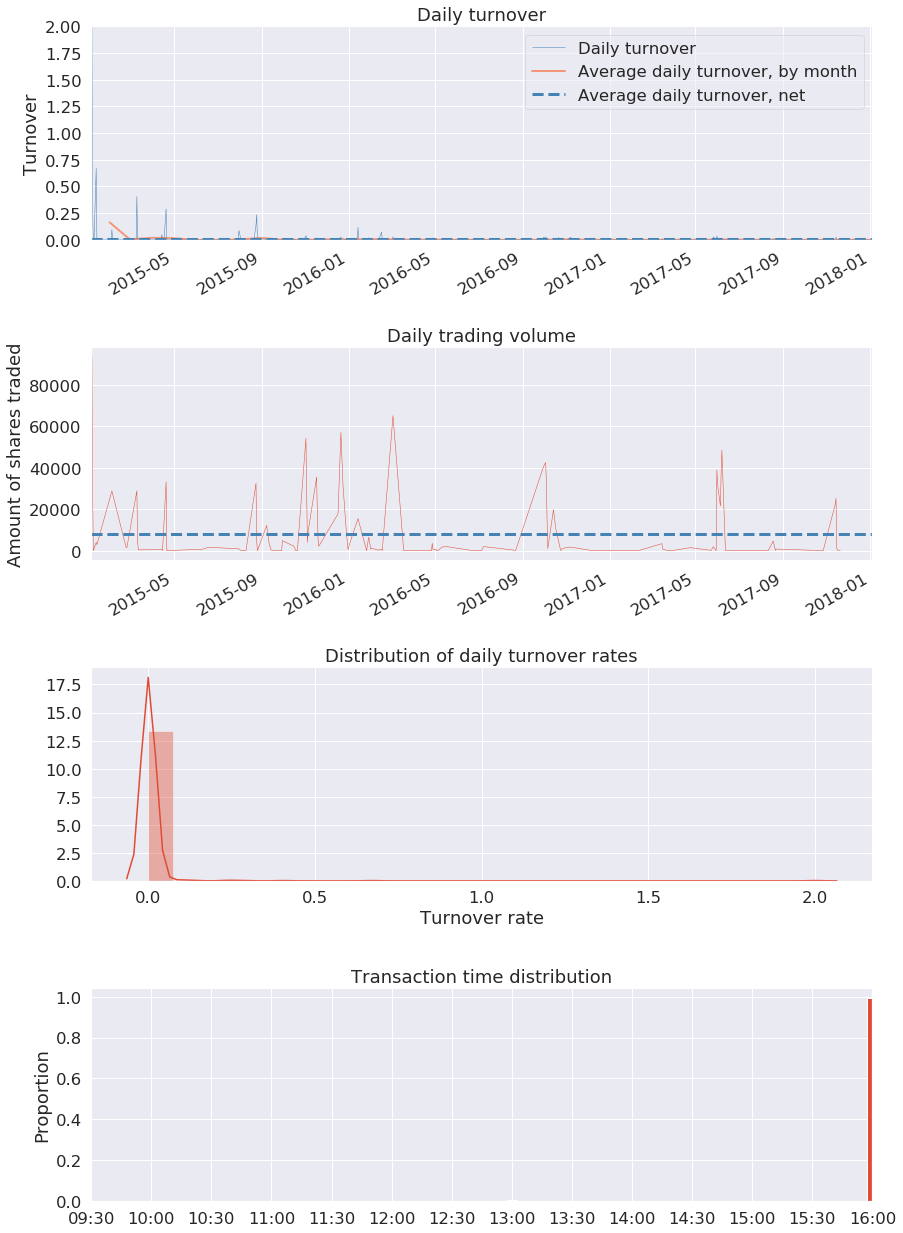

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ct,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2015-01-05 00:00:00+00:00,NaN,0.000000,NaN,-0.009419,NaN,NaN,0.000000e+00,10,1.000000e+07,0.000000e+00,...,0.0,0.0,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,1,[],0.0
2015-01-06 00:00:00+00:00,0.000976,-0.000087,NaN,-0.018749,0.000000,NaN,-1.553478e+06,0,8.446522e+06,1.552608e+06,...,0.0,0.0,0,-11.224972,1.000000e+07,0.000000e+00,0.000000e+00,2,"[{'commission': None, 'amount': 93587, 'order_...",0.0
2015-01-07 00:00:00+00:00,0.007069,0.000637,0.072304,-0.006522,0.200535,0.035080,-4.413519e+05,10,8.005170e+06,2.001200e+06,...,0.0,0.0,0,67.121379,8.446522e+06,1.552608e+06,1.552608e+06,3,"[{'commission': None, 'amount': 26461, 'order_...",0.0
2015-01-08 00:00:00+00:00,0.017879,-0.001284,-0.056846,0.011108,0.227342,-0.033440,-6.607702e+01,10,8.005104e+06,1.982059e+06,...,0.0,0.0,0,-5.297565,8.005170e+06,2.001200e+06,2.001200e+06,4,"[{'commission': None, 'amount': 4, 'order_id':...",0.0
2015-01-09 00:00:00+00:00,0.017041,-0.002605,-0.128494,0.003005,0.211430,-0.016728,-1.527697e+04,0,7.989827e+06,1.984121e+06,...,0.0,0.0,0,-7.928829,8.005104e+06,1.982059e+06,1.982059e+06,5,"[{'commission': None, 'amount': 931, 'order_id...",0.0
2015-01-12 00:00:00+00:00,0.030445,-0.007181,-0.297977,-0.004852,0.196977,0.022019,-1.980784e+06,10,6.009043e+06,3.919147e+06,...,0.0,0.0,0,-9.057598,7.989827e+06,1.984121e+06,1.984121e+06,6,"[{'commission': None, 'amount': 3983, 'order_i...",0.0
2015-01-13 00:00:00+00:00,0.032644,-0.005538,-0.195333,-0.007651,0.180241,0.015380,-4.624687e+04,0,5.962796e+06,3.981828e+06,...,0.0,0.0,0,-6.456062,6.009043e+06,3.919147e+06,3.919147e+06,7,"[{'commission': None, 'amount': 2887, 'order_i...",0.0
2015-01-14 00:00:00+00:00,0.036149,-0.009838,-0.296244,-0.013642,0.169210,0.034378,0.000000e+00,0,5.962796e+06,3.938820e+06,...,0.0,0.0,0,-8.234134,5.962796e+06,3.981828e+06,3.981828e+06,8,[],0.0
2015-01-15 00:00:00+00:00,0.033815,-0.011099,-0.291228,-0.022678,0.163174,0.032662,0.000000e+00,0,5.962796e+06,3.926218e+06,...,0.0,0.0,0,-8.612034,5.962796e+06,3.938820e+06,3.938820e+06,9,[],0.0
2015-01-16 00:00:00+00:00,0.066384,-0.000852,0.022802,-0.009861,0.172657,0.179023,0.000000e+00,0,5.962796e+06,4.028688e+06,...,0.0,0.0,0,-0.567541,5.962796e+06,3.926218e+06,3.926218e+06,10,[],0.0


limit_output extension: Maximum message size of 10000 exceeded with 39580 characters

In [12]:
%zipline --bundle quantopian-quandl --start 2015-1-4 --end 2018-1-4